In [1]:
import input_data
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = input_data.read_data_sets(".", one_hot=True)

Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz


In [3]:
training_epochs = 25
learning_rate = 0.01
batch_size = 100
display_step = 1

In [4]:
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, 10])

In [7]:
b = tf.Variable(tf.zeros([10]))
W = tf.Variable(tf.random_normal([784, 10], mean=0., \
        stddev=0.01, dtype=tf.float32))
activation = tf.nn.softmax(tf.matmul(x, W) + b)

In [14]:
cross_entroy = y * tf.log(activation)
cost = -tf.reduce_mean(tf.reduce_sum(cross_entroy, axis=1))

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
optimizer = optimizer.minimize(cost)

In [16]:
avg_set = []
epoch_set = []

Epoch:  0001 cost= 1.171024427
Epoch:  0002 cost= 0.661287199
Epoch:  0003 cost= 0.550119711
Epoch:  0004 cost= 0.496269517
Epoch:  0005 cost= 0.463259799
Epoch:  0006 cost= 0.440452019
Epoch:  0007 cost= 0.423756352
Epoch:  0008 cost= 0.410418147
Epoch:  0009 cost= 0.399667727
Epoch:  0010 cost= 0.390584047
Epoch:  0011 cost= 0.383051728
Epoch:  0012 cost= 0.376886351
Epoch:  0013 cost= 0.370573579
Epoch:  0014 cost= 0.365967288
Epoch:  0015 cost= 0.361111509
Epoch:  0016 cost= 0.356908097
Epoch:  0017 cost= 0.353314249
Epoch:  0018 cost= 0.350342925
Epoch:  0019 cost= 0.346810385
Epoch:  0020 cost= 0.343979580
Epoch:  0021 cost= 0.341285383
Epoch:  0022 cost= 0.338890380
Epoch:  0023 cost= 0.336624680
Epoch:  0024 cost= 0.334361504
Epoch:  0025 cost= 0.332408236
Training phase finished


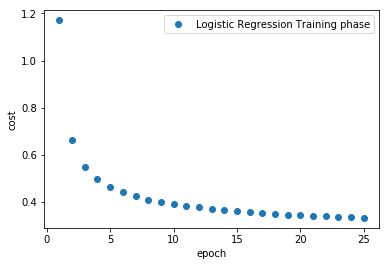

Model accuracy: 0.9144


In [24]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
        if epoch % display_step == 0 :
            print ("Epoch: ", '%04d' % (epoch+1), \
               "cost=", "{:.9f}".format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
    print ("Training phase finished")
    plt.plot(epoch_set, avg_set, 'o', \
            label='Logistic Regression Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    correct_prediction = tf.equal(\
            tf.argmax(activation, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Model accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))